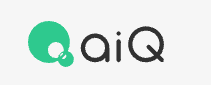

[disclaimer](./disclaimer.txt/)

# Load FACTSET Consensus Estimate data.
This sample show how to achieve the following operation with a simple interface

## `DAL`  Data Accessor Library 
> DAL access data from FACTSET database

In [1]:
from aiq_strategy_robot.data.data_accessor import DAL
from aiq_strategy_robot.data.FACTSET import load_factset_fundamental_estimates

In [2]:
handler = DAL()
data_source='FACTSET'

### Pattern 1: look up FACTSET from symbols, package and freq.

#### Find out factset symbols from tickers

In [3]:
handler.load(
    data_source,
    data_type="symbol_lookup",
    ticker=["GOOG-US", 'MSFT-US'],
    exchange_code="NAS",
    pick_only_primary=True
).retrieve().head()

,FSYM_ID,FSYM_SECURITY_ID,FACTSET_ENTITY_ID,TICKER,COMPANY_NAME,EXCHANGE_CODE,CURRENCY,FIGI,BBG_TICKER
0,P8R3C2-R,DF3K29-S,000Q07-E,MSFT-US,Microsoft Corporation,NAS,USD,BBG000BPH459,MSFT US
2,WFJYTJ-R,DC1QVX-S,0FPWZZ-E,GOOG-US,Alphabet Inc. Class C,NAS,USD,BBG009S3NB30,GOOG US


### `load_factset_fundamental_estimates`  
loading FACTSET consensus estimates 

In [4]:
handler = load_factset_fundamental_estimates(handler,                        
                                    symbols=["WFJYTJ-R","P8R3C2-R"],
                                    package="BASIC",
                                    freq=3)

handler.retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,P8R3C2-R,CFPS,USD,8,4.951695,4.951695,2,4.93709,4.966299,0.020654,2,0,2024-01-31,2024-04-14,2004-11-15,2025-12-31
1,P8R3C2-R,EPS,USD,2,2.474571,2.491132,35,2.14000,2.660000,0.109955,7,23,2023-03-16,2023-03-19,2004-11-15,2023-06-30
2,P8R3C2-R,SALES,USD,2,42462.368873,42418.000000,22,40968.00000,43810.184084,810.735897,10,0,2021-05-29,2021-06-08,2004-11-15,2021-09-30
3,P8R3C2-R,EPS,USD,6,1.789017,1.800000,20,1.65000,1.930000,0.087136,5,9,2020-12-18,2020-12-26,2004-11-15,2022-03-31
4,P8R3C2-R,SALES,USD,1,35714.349346,35705.000000,25,35000.00000,36394.000000,288.369688,4,10,2020-08-08,2020-08-08,2004-11-15,2020-09-30


### Data Access handler load
Load the data to memory

same return as **load_factset_fundamental_estimates**
```
sdh = load_factset_fundamental_estimates(handler,                        
                                    symbols="WFJYTJ-R",
                                    package="BASIC",
                                    freq=3)

```

In [5]:
handler.load(
    data_source,
    data_type="fundamental_estimates",
    symbols="WFJYTJ-R",
    package="BASIC",
    freq=3
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,SALES,USD,3,14780.355882,14823.000000,34,14073.800000,15701.100000,387.461308,0,3,2014-07-06,2014-07-06,2022-07-18,2014-12-31
1,WFJYTJ-R,SALES,USD,2,14941.540000,14954.500000,40,14325.000000,15604.000000,290.899624,0,5,2014-10-10,2014-10-12,2022-07-18,2014-12-31
2,WFJYTJ-R,SALES,USD,5,49884.297000,49824.000000,9,46583.873000,52037.000000,1572.287444,1,4,2020-03-23,2020-03-25,2022-07-18,2021-03-31
3,WFJYTJ-R,EPS,USD,1,1.307520,1.297500,40,1.145000,1.658404,0.109033,21,3,2022-03-09,2022-03-21,2022-07-18,2022-03-31
4,WFJYTJ-R,EPS,USD,4,0.299003,0.298038,24,0.277269,0.327067,0.012298,0,16,2013-10-01,2013-10-01,2022-07-18,2014-06-30


#### Narrow down output by specifying optional parameters
- `fields`: shrink by fundamental item names
- `start_datetime` and `end_datetime`: shrink by fundamental data releases

#### Specifying releases

In [6]:
# Get 'sales' and 'EPS' items only.
load_factset_fundamental_estimates(handler,  
    symbols="WFJYTJ-R",
    fields=["SALES", "EPS"],
    package="BASIC",
    freq=3
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,SALES,USD,6,58397.257071,58694.3000,14,53635.1000,61167.6000,1965.096080,0,0,2020-10-14,2020-10-18,2022-07-18,2021-12-31
1,WFJYTJ-R,SALES,USD,6,58680.379933,58819.0000,15,53956.4000,62322.8000,2095.086332,0,0,2020-10-19,2020-10-21,2022-07-18,2021-12-31
2,WFJYTJ-R,EPS,USD,2,0.682096,0.6825,35,0.5675,0.8050,0.053062,5,3,2020-10-19,2020-10-21,2022-07-18,2020-12-31
3,WFJYTJ-R,SALES,USD,2,50641.594239,50533.0000,33,47450.5000,55965.0000,1707.747536,7,1,2020-10-19,2020-10-21,2022-07-18,2020-12-31
4,WFJYTJ-R,EPS,USD,5,1.604299,1.5860,23,1.3315,1.9865,0.141837,4,2,2022-01-27,2022-01-27,2022-07-18,2022-12-31


#### Specifying release timings

In [7]:
# Get records for 2021 and 2022. See `fiscal_period_end_date` column.
load_factset_fundamental_estimates(handler, 
    symbols="WFJYTJ-R",
    package="BASIC",
    freq=3,
    start_datetime='2021-01-01',
    end_datetime='2022-12-31'
).retrieve().head()

,symbol,FE_ITEM,CURRENCY,FE_PER_REL,FE_MEAN,FE_MEDIAN,FE_NUM_EST,FE_LOW,FE_HIGH,FE_STD_DEV,FE_UP,FE_DOWN,consensus_start_date,consensus_end_date,adjustment_date,fiscal_period_end_date
0,WFJYTJ-R,SALES,USD,6,58397.257071,58694.300,14,53635.1000,61167.6000,1965.096080,0,0,2020-10-14,2020-10-18,2022-07-18,2021-12-31
1,WFJYTJ-R,SALES,USD,6,58680.379933,58819.000,15,53956.4000,62322.8000,2095.086332,0,0,2020-10-19,2020-10-21,2022-07-18,2021-12-31
2,WFJYTJ-R,EPS,USD,5,1.604299,1.586,23,1.3315,1.9865,0.141837,4,2,2022-01-27,2022-01-27,2022-07-18,2022-12-31
3,WFJYTJ-R,EPS,USD,1,1.188554,1.210,41,0.8300,1.3700,0.121152,0,38,2022-12-20,2023-01-01,2022-07-18,2022-12-31
4,WFJYTJ-R,SALES,USD,1,76731.960509,76672.614,35,72291.0000,80407.0000,1503.701206,1,30,2023-01-02,2023-01-03,2022-07-18,2022-12-31
